## Business Problem 
#### Create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, inseated of needing an experinced biologist

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\KIRTI RAJ PRADHAN'

In [4]:
os.chdir("C:\\Users\\KIRTI RAJ PRADHAN\\Downloads")

In [5]:
df=pd.read_csv("penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## EDA

In [7]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [8]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [9]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [10]:
df['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [11]:
df['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [12]:
df.shape

(344, 7)

In [13]:
df.size

2408

In [14]:
df=df[df['sex']!='.']
df.shape

(343, 7)

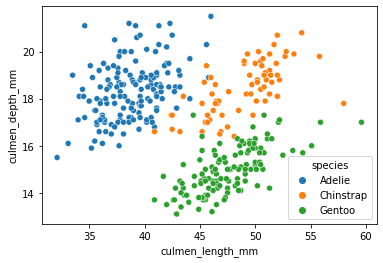

In [15]:
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='species')
plt.show()

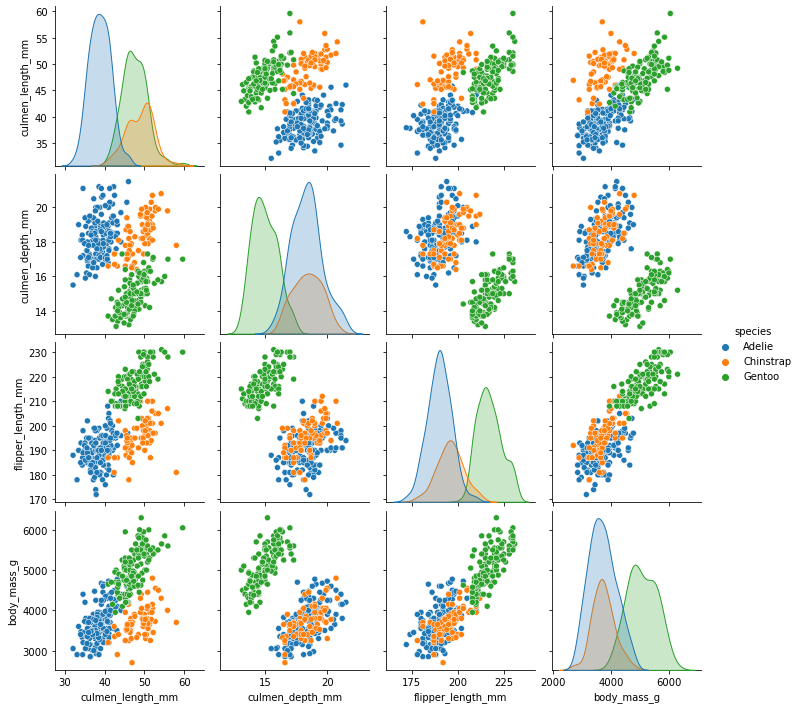

In [16]:
sns.pairplot(df,hue='species')
plt.show()

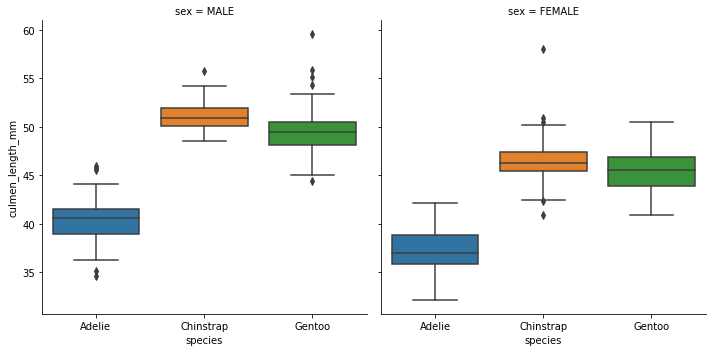

In [17]:
sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box',col='sex')
plt.show()

## Feature Engineering
#### Missing Values

In [18]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [19]:
df=df.dropna()
df.shape

(333, 7)

In [20]:
pd.get_dummies(df.drop('species',axis=1),drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


In [21]:
X=pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y=df['species']

## Train Test Split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3,random_state=101)

## Modelling 
### Decision Tree Classifier - with deafult Hyperparameters

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
model=DecisionTreeClassifier()

In [25]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

### Prediction

In [26]:
train_pred=model.predict(X_train)

In [27]:
test_pred=model.predict(X_test)

## Evaluation

In [28]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [29]:
accuracy_score(y_train,train_pred)

1.0

In [30]:
accuracy_score(y_test,test_pred)

0.92

C:\Users\KIRTI RAJ PRADHAN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


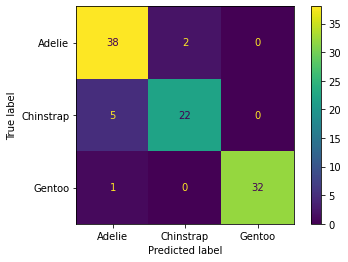

In [31]:
plot_confusion_matrix(model,X_test,y_test)
plt.show()

In [32]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

      Adelie       0.86      0.95      0.90        40
   Chinstrap       0.92      0.81      0.86        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.92       100
weighted avg       0.92      0.92      0.92       100



In [33]:
model.feature_importances_

array([0.33350103, 0.02010577, 0.60833251, 0.        , 0.03806069,
       0.        , 0.        ])

In [34]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
culmen_length_mm,0.333501
culmen_depth_mm,0.020106
flipper_length_mm,0.608333
body_mass_g,0.000000
island_Dream,0.038061
island_Torgersen,0.000000
sex_MALE,0.000000


## Visualize the Tree

In [35]:
from sklearn.tree import plot_tree

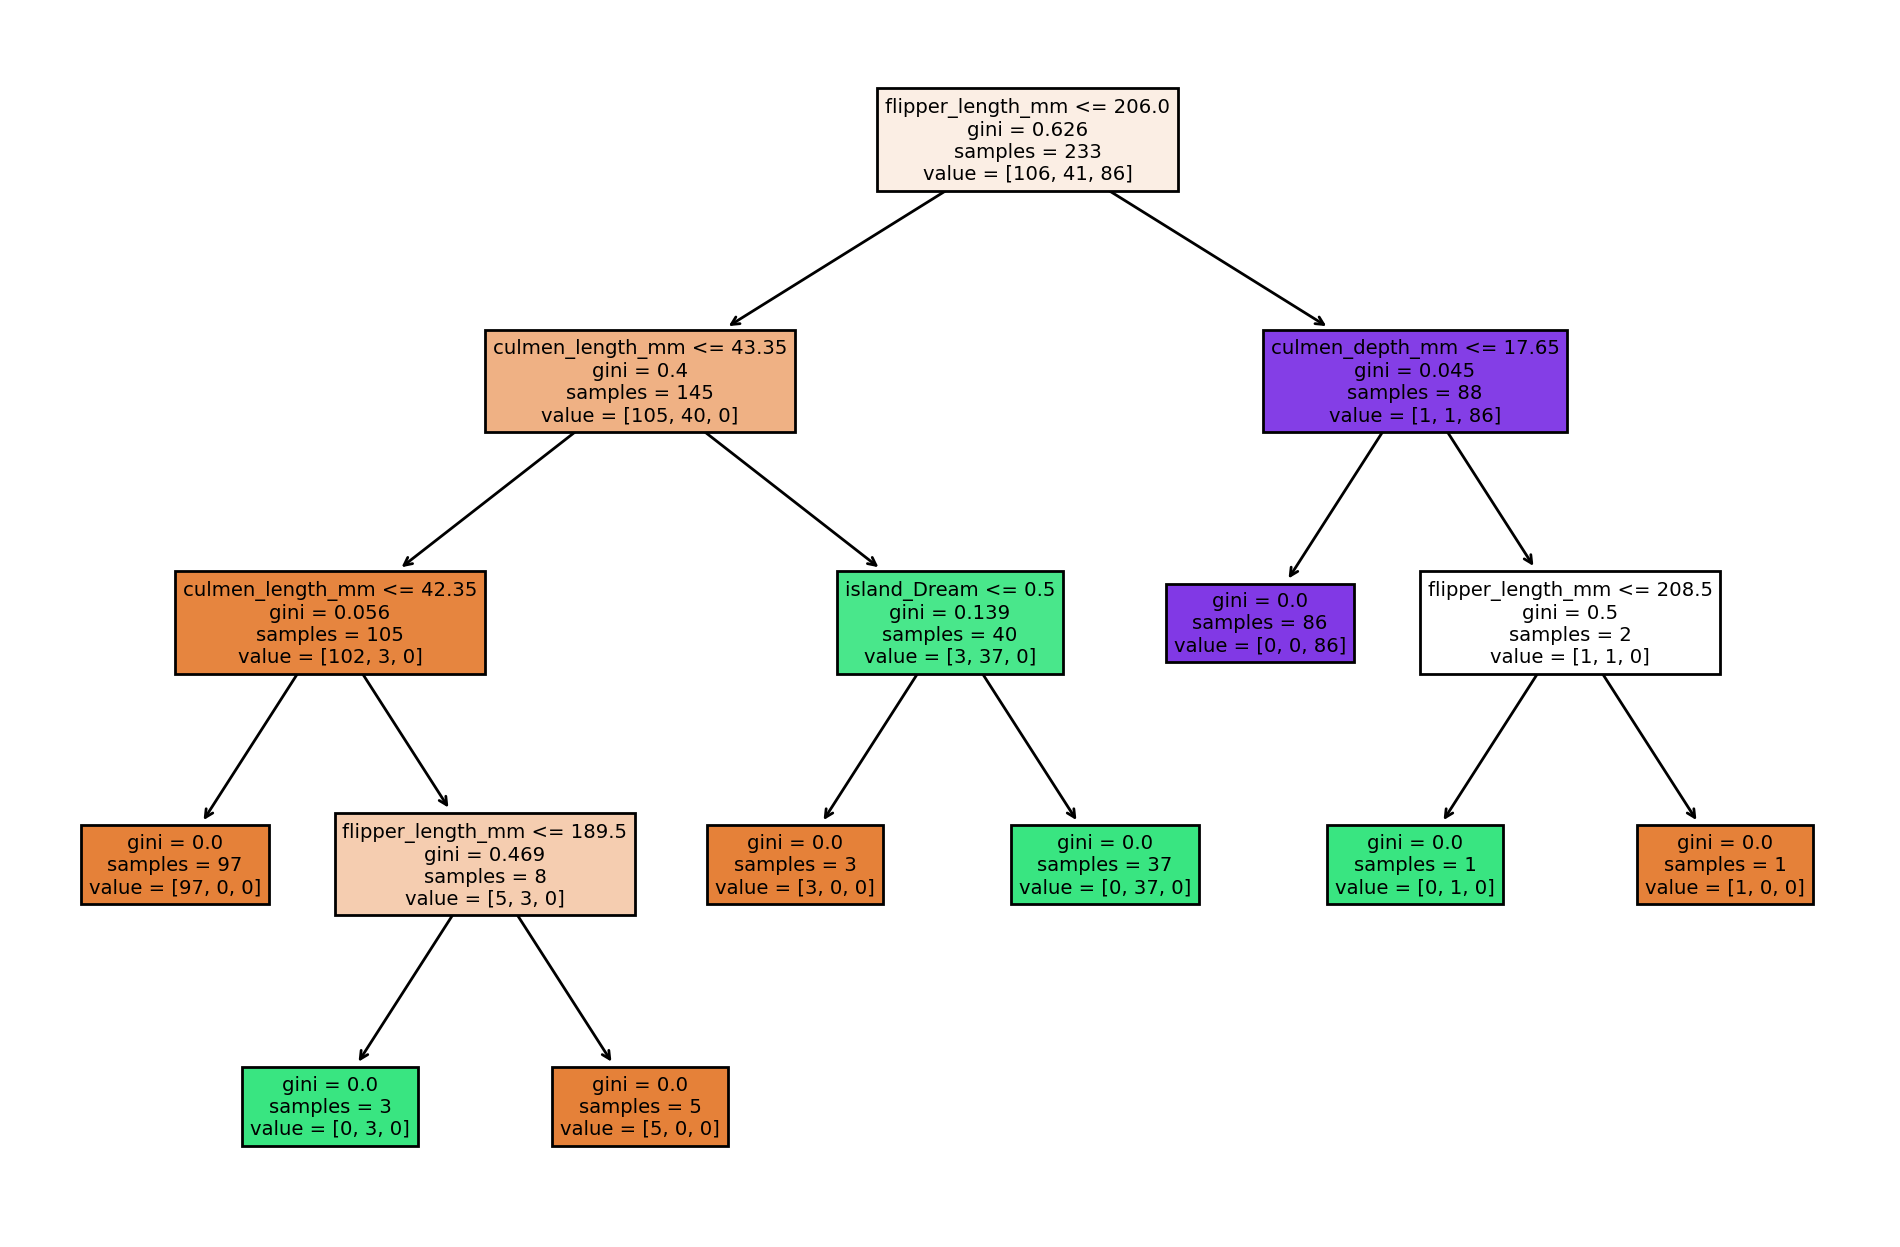

In [36]:
plt.figure(figsize=(12,8),dpi=200)
plot_tree(model,filled=True,feature_names=X.columns)
plt.show()

## Optimization --- Pruning of Decision Tree
### Max Depth

In [37]:
pruned_tree = DecisionTreeClassifier(max_depth=2)

In [38]:
def report_model(model):
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    print("Train accuracy: ",accuracy_score(y_train,train_pred))
    print("Test accuarcy: ",accuracy_score(y_test,test_pred))
    plt.figure(figsize=(12,8),dpi=200)
    plot_tree(model,filled=True,feature_names=X.columns)

Train accuracy:  1.0
Test accuarcy:  0.92


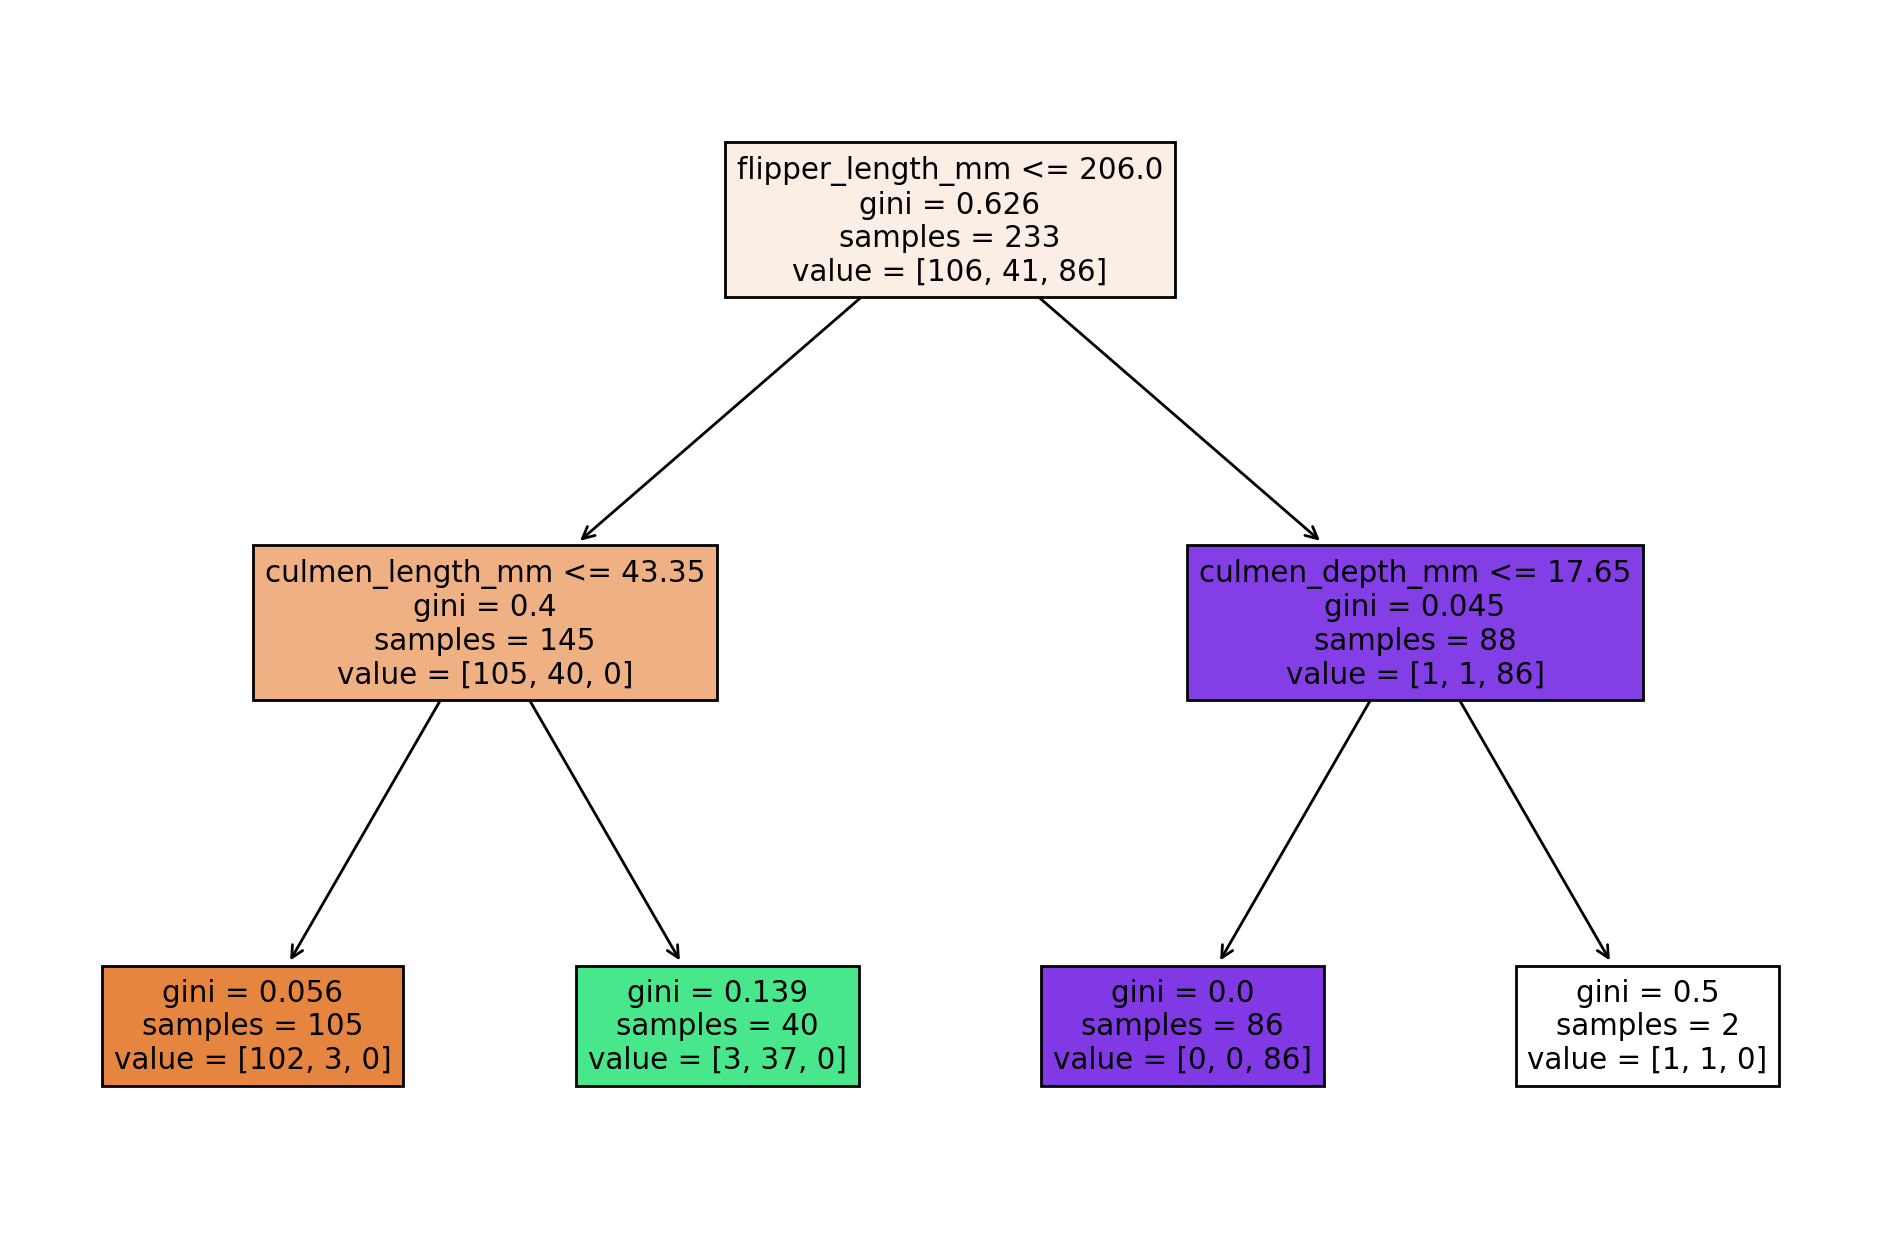

In [39]:
report_model(pruned_tree)

## Max leaf Nodes 

In [40]:
pruned_tree= DecisionTreeClassifier(max_leaf_nodes=3)

Train accuracy:  1.0
Test accuarcy:  0.92


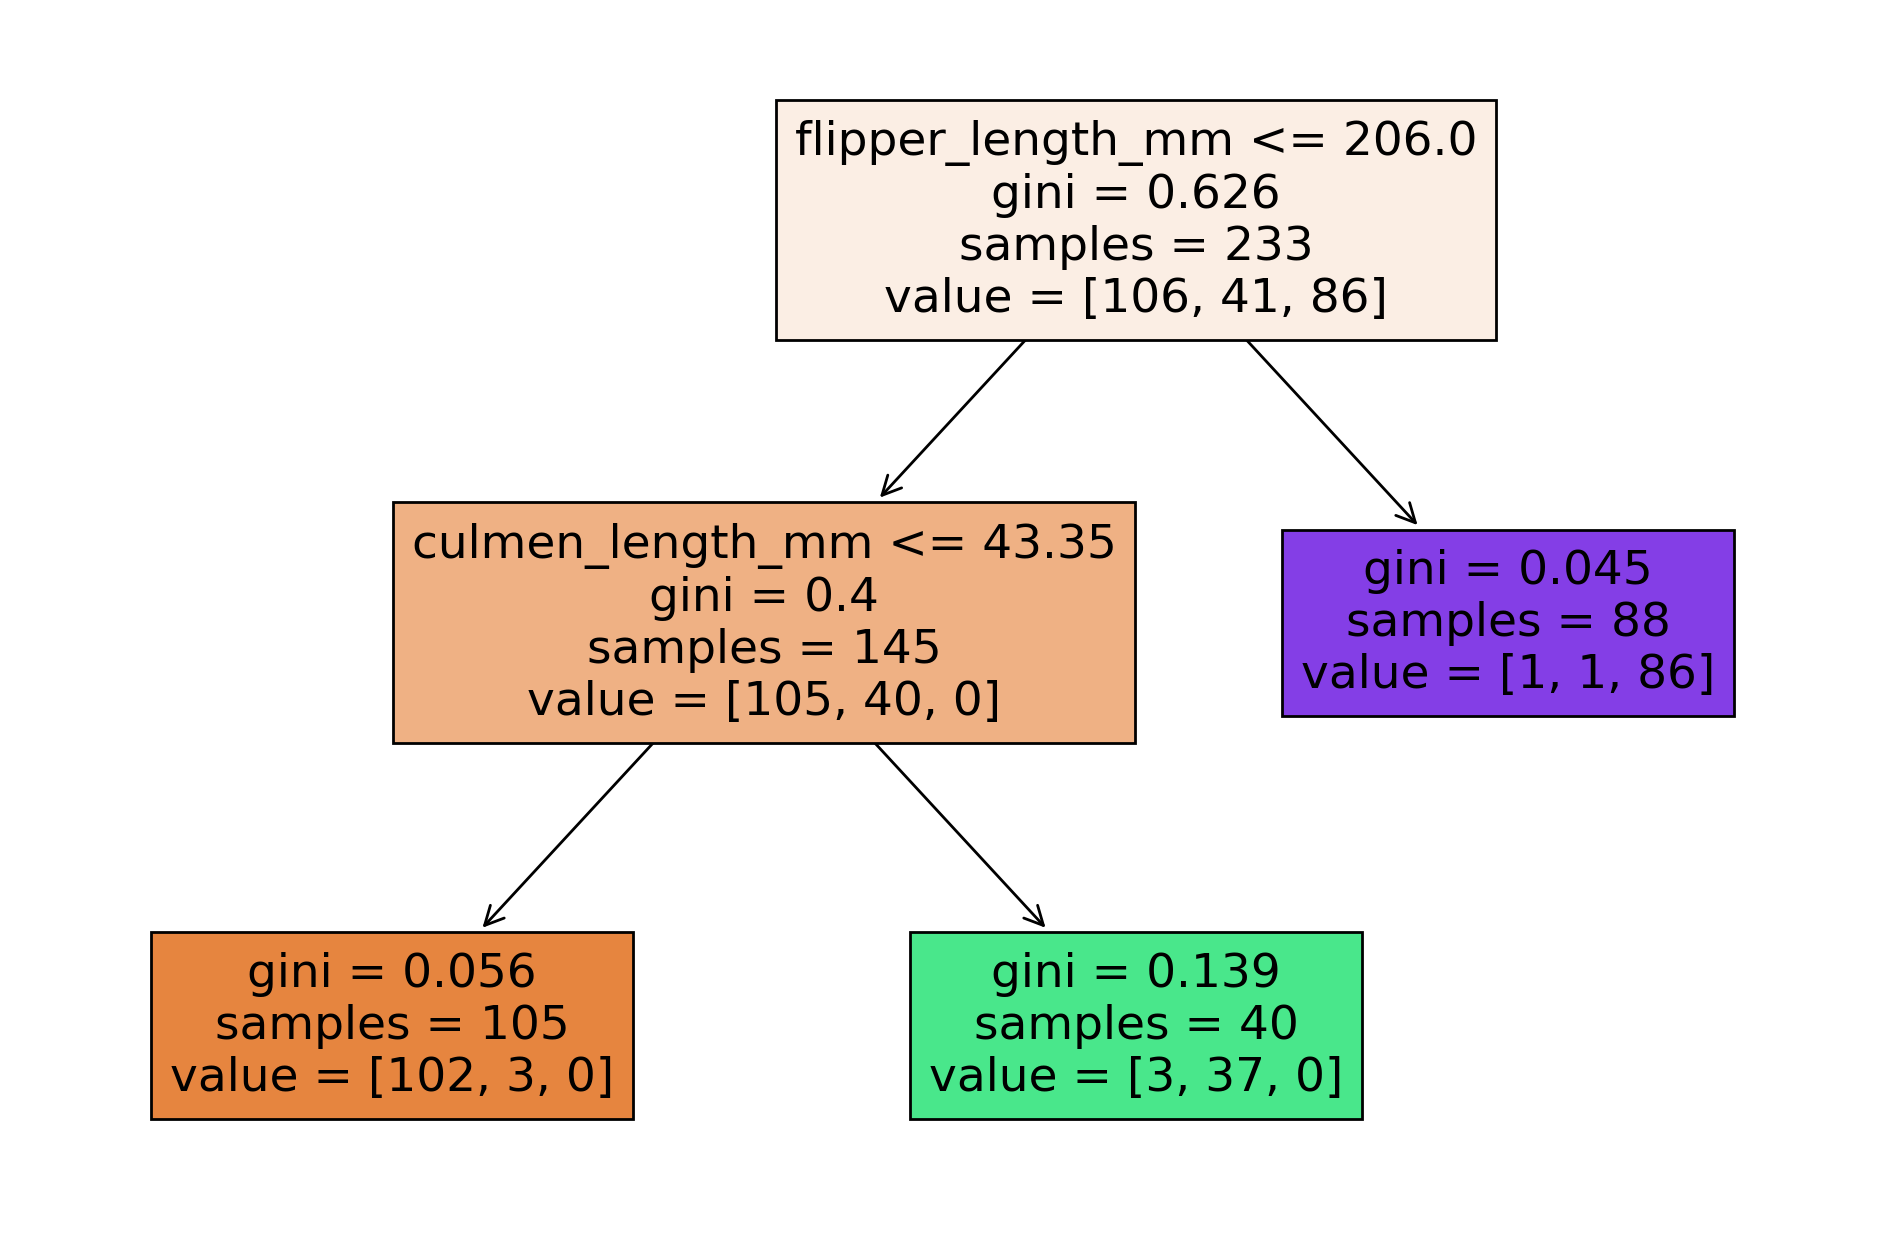

In [41]:
report_model(pruned_tree)

## Hyperparameter Tuning

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
estimator=DecisionTreeClassifier()
param_grid={'max_depth':[1,2,3,4,5],'max_leaf_nodes':[1,2,3,4,5,6,7,8],
           'criterion':['gini','entropy']}

In [44]:
grid=GridSearchCV(estimator,param_grid,cv=5)
grid.fit(X,y)

C:\Users\KIRTI RAJ PRADHAN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KIRTI RAJ PRADHAN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KIRTI RAJ PRADHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\KIRTI RAJ PRADHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 314, in fit
    raise ValueError(
ValueError: max_leaf_nodes 1 mus

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8]})

In [45]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 8}

In [46]:
model=DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, max_leaf_nodes= 8)
model.fit(X_train,y_train)

train_y_pred=model.predict(X_train)
test_y_pred=model.predict(X_test)

print(accuracy_score(y_train,train_y_pred))
print(accuracy_score(y_test,test_y_pred))

0.9957081545064378
0.96
